# Linear Regression

**What does it do?**
It fits a line minimizing the sum of mean squared error (MSE) between the predicted and actual values.

**Note**: This algorithm has a unique local optimum that also serves as the global optimum. As a result, the cost function should consistently decrease and converge to the same minimum value when plotted.


Here are all the formulas: 
![Alt text](../images/linear_regression_formula.png)



## Implementation without sklearn



In [1]:
## Loading dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#### Loading the dataset
housing_dataset = pd.read_csv('../datasets/home.txt',names=["size","bedroom","price"]) #read the data
print(housing_dataset.head()) #print the first 5 rows of the data
print(housing_dataset.shape) #print the first 5 rows of the data

   size  bedroom   price
0  2104        3  399900
1  1600        3  329900
2  2400        3  369000
3  1416        2  232000
4  3000        4  539900
(47, 3)


In [3]:
# Split the data to train and test
housing_dataset = housing_dataset.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle the data
housing_dataset = (housing_dataset - housing_dataset.mean())/housing_dataset.std()
train_size = int(0.8 * len(housing_dataset))  # 80% for training
train_data = housing_dataset[:train_size]
test_data = housing_dataset[train_size:]

In [4]:
def cost_function(y, y_pred):
    m = len(y)
    return (1 / (2 * m)) * np.sum((y_pred - y) ** 2)

In [20]:
def gradient_descent(X, y, alpha=0.01, iterations=1000):
    """Gradient descent for linear regression"""
    m = len(y)
    X = np.concatenate((np.ones([X.shape[0], 1]), X), axis = 1)  # Shape: (m, n+1)
    theta = np.zeros(X.shape[1])
    cost_history = []
    for i in range(iterations):
        y_pred = X.dot(theta) 
        cost = cost_function(y, y_pred)
        cost_history.append(cost)
        theta -= (alpha / m) * (X.T.dot(y_pred - y))
    y_pred = X.dot(theta) 
    cost = cost_function(y, y_pred)
    print(f"Iteration {i}: Cost = {cost:.4f}")
    return theta, cost_history

Iteration 999: Cost = 0.1181


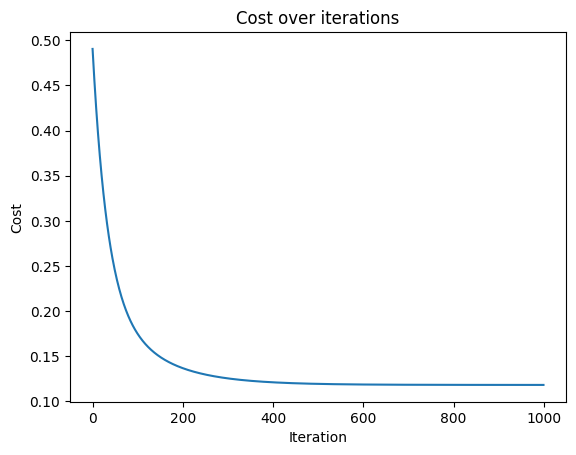

In [21]:
# Run the gradient descent on the dataset
X = train_data[["size", "bedroom"]].values
y = train_data["price"].values
theta, cost_history = gradient_descent(X, y)
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost over iterations")
plt.show()


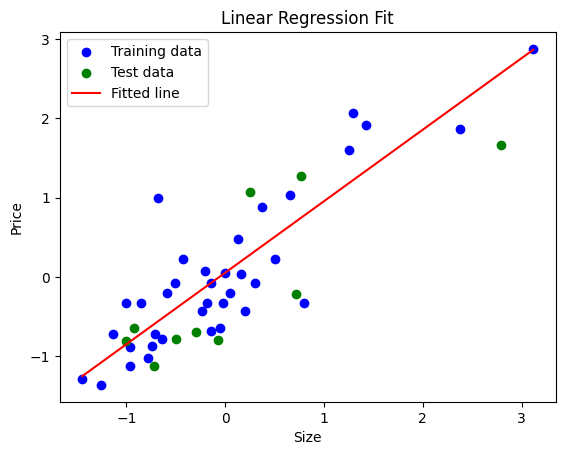

In [22]:
# Compute theta using the normal equation
# theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Plot the results
plt.scatter(train_data["size"], train_data["price"], color="blue", label="Training data")
plt.scatter(test_data["size"], test_data["price"], color="green", label="Test data")

# Generate predictions for the fitted line
x_line = np.linspace(housing_dataset["size"].min(), housing_dataset["size"].max(), 100)
y_line = theta[0] + x_line * theta[1]  # Assuming "size" is the first feature
plt.plot(x_line, y_line, color="red", label="Fitted line")

plt.xlabel("Size")
plt.ylabel("Price")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()